<a href="https://colab.research.google.com/github/mauro-nievoff/Procesamiento-de-Imagenes/blob/main/TP2_Nievas_Offidani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 2 - Procesamiento Digital de Imágenes

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


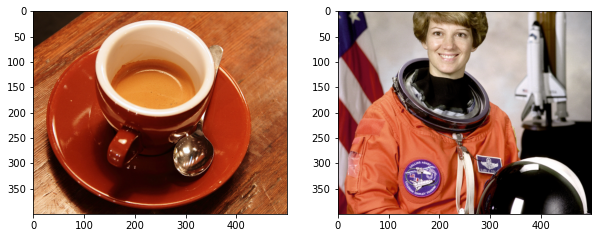

In [5]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

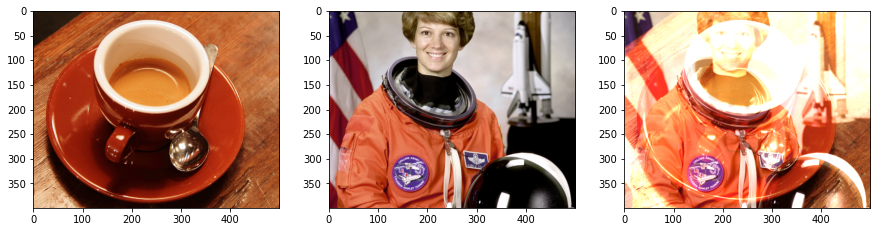

In [7]:
# Suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

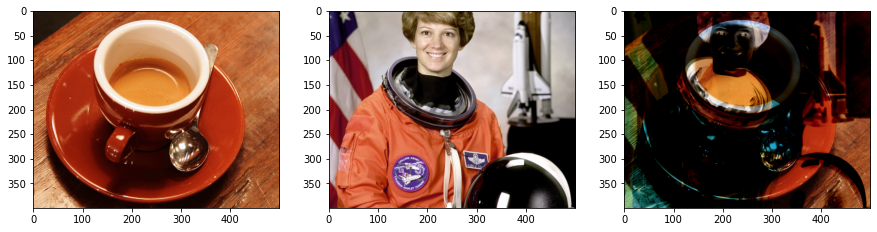

In [8]:
# Resta clampleada
img_4 = np.clip(img_1 - img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_4)

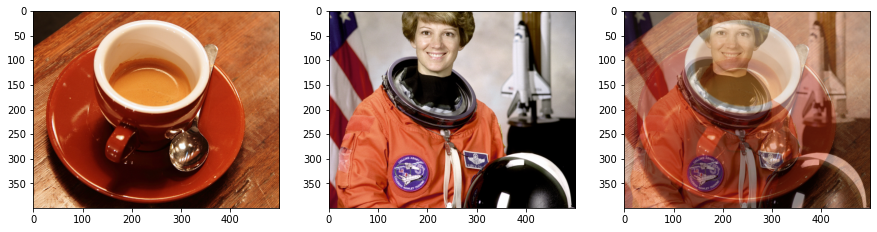

In [9]:
# Suma promediada
img_5 = (img_1 + img_2) / 2

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


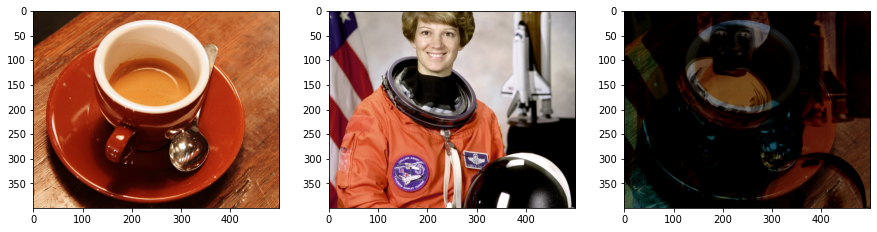

In [10]:
# Resta promediada
img_6 = (img_1 - img_2) / 2

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_6)

In [11]:
# Suma en YIQ

img_1_yiq = rgb2yiq(img_1)

img_2_yiq = rgb2yiq(img_2)

In [12]:
YA = img_1_yiq[:,:,0]
YB = img_2_yiq[:,:,0]
IA = img_1_yiq[:,:,1]
IB = img_2_yiq[:,:,1]
QA = img_1_yiq[:,:,2]
QB = img_2_yiq[:,:,2]

In [13]:
YC = (YA + YB) / 2

IC = (YA * IA + YB * IB) / (YA + YB)

QC = (YA * QA + YB * QB) / (YA + YB)

In [14]:
img_7_yiq = np.zeros(shape = img_1.shape)

img_7_yiq[:,:,0] = YC

img_7_yiq[:,:,1] = IC

img_7_yiq[:,:,2] = QC

In [15]:
img_7 = yiq2rgb(img_7_yiq)

img_7 = np.clip(img_7, 0, 1)

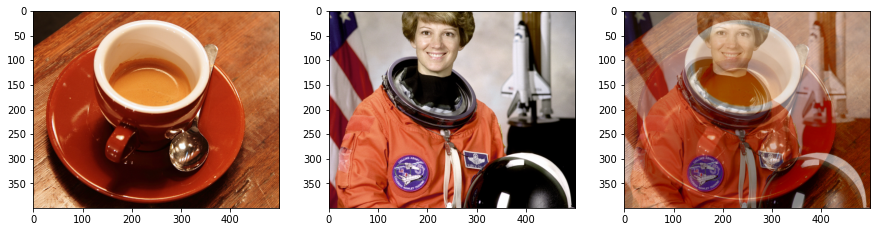

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_7)

In [17]:
# Resta en YIQ

YC_resta = (YA - YB) / 2

IC_resta = (YA * IA - YB * IB) / (YA + YB)

QC_resta = (YA * QA - YB * QB) / (YA + YB)

In [18]:
img_8_yiq = np.zeros(shape = img_1.shape)

img_8_yiq[:,:,0] = YC_resta

img_8_yiq[:,:,1] = IC_resta

img_8_yiq[:,:,2] = QC_resta

In [19]:
img_8 = yiq2rgb(img_8_yiq)

img_8 = np.clip(img_8, 0, 1)

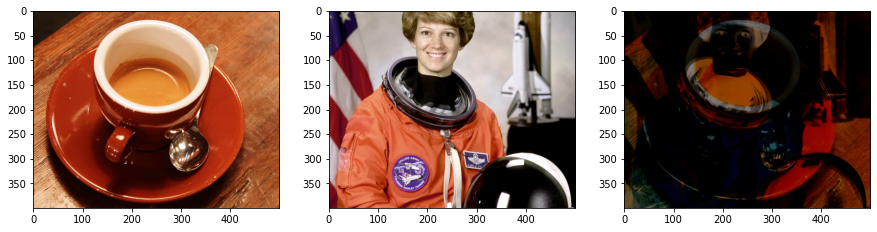

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_8)

In [21]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]


In [22]:
# if-lighter

YC_if_lighter = np.zeros(shape = YA.shape)

YC_if_lighter[YA > YB] = YA[YA > YB]
YC_if_lighter[YA <= YB] = YB[YA <= YB]

IC_if_lighter = np.zeros(shape = YA.shape)

IC_if_lighter[YA > YB] = IA[YA > YB]
IC_if_lighter[YA <= YB] = IB[YA <= YB]

QC_if_lighter = np.zeros(shape = YA.shape)

QC_if_lighter[YA > YB] = QA[YA > YB]
QC_if_lighter[YA <= YB] = QB[YA <= YB]

In [23]:
img_9_yiq = np.zeros(shape = img_1.shape)

img_9_yiq[:,:,0] = YC_if_lighter

img_9_yiq[:,:,1] = IC_if_lighter

img_9_yiq[:,:,2] = QC_if_lighter

In [24]:
img_9 = yiq2rgb(img_9_yiq)

img_9 = np.clip(img_9, 0, 1)

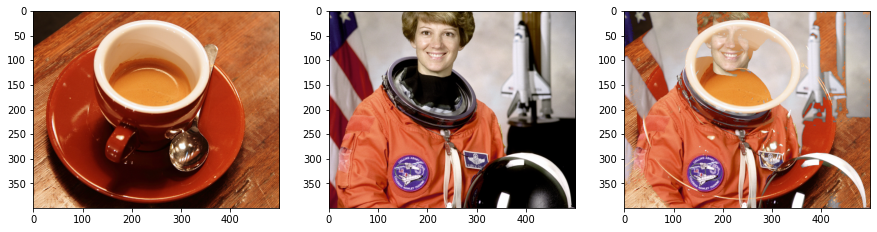

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_9)

In [ ]:
# if-darker

YC_if_darker = np.zeros(shape = YA.shape)

YC_if_darker[YA < YB] = YA[YA < YB]
YC_if_darker[YA >= YB] = YB[YA >= YB]

IC_if_darker = np.zeros(shape = YA.shape)

IC_if_darker[YA < YB] = IA[YA < YB]
IC_if_darker[YA >= YB] = IB[YA >= YB]

QC_if_darker = np.zeros(shape = YA.shape)

QC_if_darker[YA < YB] = QA[YA < YB]
QC_if_darker[YA >= YB] = QB[YA >= YB]

In [ ]:
img_10_yiq = np.zeros(shape = img_1.shape)

img_10_yiq[:,:,0] = YC_if_darker

img_10_yiq[:,:,1] = IC_if_darker

img_10_yiq[:,:,2] = QC_if_darker

In [ ]:
img_10 = yiq2rgb(img_10_yiq)

img_10 = np.clip(img_10, 0, 1)

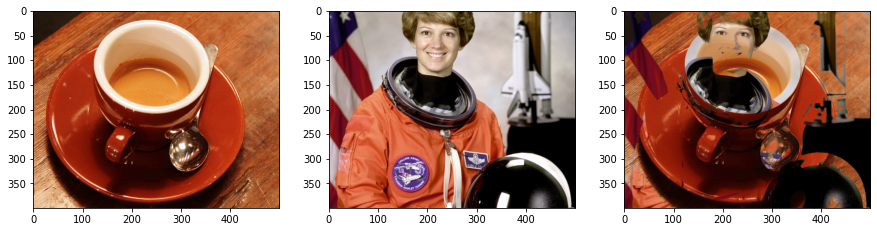

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_10)